# Project Overview And Dataset

# Project
## In this project we will use Neural Network to know the person have skin-cancer malignant   or benign using CNN through photo and make extraction to photo to know that  cancer is malignant or benign.

# Dataset
## We use Skin-Cancer Database which is available on <a href = https://www.kaggle.com>Kaggle</a> You can view and download the dataset from this <a href = https://www.kaggle.com/datasets/fanconic/skin-cancer-malignant-vs-benign>Link</a>.

# Using Opencv to deal with Images

In [1]:
! pip install opencv-python

In [2]:
# Use to read images.
import cv2

In [3]:
IMG_DIMEN = 224 # original size is 224
N_COLORS = 3    # 3 use RGB , 1 use  Gray

# Build Funcion to handle Images And Extension

In [36]:
def convert_img_to_matrix(img_path):
    
    '''
       Convert an image into matrix.
       
       Input:
       img_path ==> the path to find image
       
       Output:
       return image in array with shape (1, IMG_DIMEN, IMG_DIMEN, N_COLORS)
       
       This Function use constat parameter IMG_DIMEN AND N_COLORS.
    '''
    
    global IMG_DIMEN
    global N_COLORS
    img = cv2.imread(img_path)
    # Make scale to be in the same size.
    img = cv2.resize(img, dsize = (IMG_DIMEN, IMG_DIMEN))
    
    if N_COLORS == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    elif N_COLORS == 1:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
    # To shange the reshape of all photo be in the same size. ( if RGB OR GRAY ) 
    img = img.reshape((1, IMG_DIMEN, IMG_DIMEN, N_COLORS))
    return img

In [37]:
import os 

def get_list_of_image_paths(image_folder_name, extension):
    
    
    filenames = os.listdir(image_folder_name)
    image_paths_list = []
    for filename in filenames:
        if filename.endswith('.' + extension):
            image_paths_list.append(image_folder_name+'/'+filename)
    return image_paths_list

In [38]:
from tqdm import tqdm
import numpy as np

def convert_Images_to_matrix(img_paths):
    '''
       Input:
       img_paths ==> A list of paths of images returns by get_list_of_image_paths() function.
       
       Output:
       return a numpy array containing all image of img_paths with shape(n_images, IMG_DIMEN, IMG_DIMEN, N_COLORS)
    '''
    
    list_of_matrices = []
    for img_path in tqdm(img_paths):
        img = convert_img_to_matrix(img_path)
        list_of_matrices.append(img)
    return np.vstack(list_of_matrices)

In [39]:
def load_images(images_folder_name, extension):
    '''
      Input:
         images_folder_name ==> The full path of folder directly containing image.
         extension ==> file name extension for images.
         
      Output:
         Return numpy array containing all images. 
    '''
    imageList = get_list_of_image_paths(images_folder_name, extension)
    dataset = convert_Images_to_matrix(imageList)
    return dataset.astype('float32')/225         # Devide by 255 mean make feature scaling to be between 0 and 1.

# Read train dataset And put it in one stack

In [40]:
# Read part of dataset ==> train_benign.
X_0 = load_images('data/train/benign', 'jpg')

100%|█████████████████████████████████████████████████████████████████████████████| 1440/1440 [00:03<00:00, 410.39it/s]


In [41]:
# Read part of dataset ==> train_malignant.
X_1 = load_images('data/train/malignant', 'jpg')

100%|█████████████████████████████████████████████████████████████████████████████| 1197/1197 [00:02<00:00, 547.92it/s]


In [42]:
# Concate all train dataset.
X = np.vstack([X_0, X_1])

X.shape

(2637, 224, 224, 3)

In [44]:
y_0 = np.zeros((X_0.shape[0], 1))
y_1 = np.ones((X_1.shape[0], 1))

# Concate the output of train.
y = np.vstack([y_0, y_1]).flatten()
y.shape

(2637,)

In [45]:
# Delete element that not need to decrease consumption in ram.
del X_0
del X_1
del y_0
del y_1

# Read test dataset And put it in one stack

In [46]:
# Read part of dataset ==> test_benign.
X_test_0 = load_images('data/test/benign', 'jpg')

100%|███████████████████████████████████████████████████████████████████████████████| 360/360 [00:01<00:00, 346.37it/s]


In [47]:
# Read part of dataset ==> test_malignant.
X_test_1 = load_images('data/test/malignant', 'jpg')

100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 529.43it/s]


In [48]:
# Concatenate the test values.
X_test = np.vstack([X_test_0, X_test_1])

X_test.shape

(660, 224, 224, 3)

In [51]:
y_test_0 = np.zeros((X_test_0.shape[0], 1))
y_test_1 = np.ones((X_test_1.shape[0], 1))

# Concate the output of test.
y_test = np.vstack([y_test_0, y_test_1]).flatten()
y_test.shape

(660,)

In [52]:
# Delete element that not need to decrease consumption in ram.
del X_test_0
del X_test_1
del y_test_0
del y_test_1 

# Splitting traing to Training And Validation

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [55]:
print(X_train.shape)
print(y_train.shape)
print()
print(X_val.shape)
print(y_val.shape)
print()
print(X_test.shape)
print(y_test.shape)

(1766, 224, 224, 3)
(1766,)

(871, 224, 224, 3)
(871,)

(660, 224, 224, 3)
(660,)


# Build Function to show sample of Dataset

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

# Function to show you any sample of photo in dataset.
def imshow(img):
    global N_COLORS
    plt.figure(figsize = (6, 6))
    if N_COLORS == 3:
        plt.imshow(img)
    elif N_COLORS == 1:
        plt.imshow(img, cmap = 'gray')
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


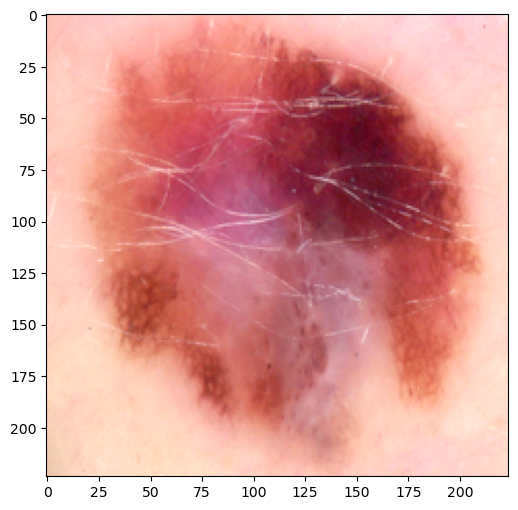

In [57]:
# Show the first image in training.
imshow(X_train[0])

# Build CNN Neural Network

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense

# Extraction Images And Build Neural Network

In [69]:
# Build your Model.
model = Sequential()

# Conv2D(number_of_filter, area_of_filter_that_use).
# imput_shape ==> to know the shap of all photos.
model.add(Conv2D(16, 7, activation = 'relu', input_shape = (IMG_DIMEN, IMG_DIMEN, N_COLORS)))
model.add(Conv2D(16, 7, activation = 'relu'))

# MaxPooling2D(area_of_filter_that_use).
model.add(MaxPooling2D(2))  # Use filter 2x2.

# Make another convoluation.
model.add(Conv2D(32, 5, activation = 'relu'))
model.add(Conv2D(32, 5, activation = 'relu'))

# Make another MaxPooling.
model.add(MaxPooling2D(2))  # Use filter 2x2.

# Make another convoluation.
model.add(Conv2D(64, 3, activation = 'relu'))
model.add(Conv2D(64, 3, activation = 'relu'))

# Make another MaxPooling.
model.add(MaxPooling2D(2))  # Use filter 2x2.

# To make flatten and be in one dimension.
model.add(GlobalAveragePooling2D())

# Build normal neural network.
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Train And Save the best path of Neuron

In [72]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    'saved-model/best-model', monitor = 'val_loss', model = 'min',
    save_weights_only = True, save_best_only = True, verbose = 1
)

history = model.fit(
    X_train, y_train,
    validation_data = (X_val, y_val),
    batch_size = 32,
    epochs = 60,
    callbacks = [checkpoint]
)

Epoch 1/60
56/56 [==============================] - ETA: 0s - loss: 0.6685 - accuracy: 0.5685 
Epoch 1: val_loss improved from inf to 0.61739, saving model to saved-model\best-model
56/56 [==============================] - 872s 16s/step - loss: 0.6685 - accuracy: 0.5685 - val_loss: 0.6174 - val_accuracy: 0.5476
Epoch 2/60
56/56 [==============================] - ETA: 0s - loss: 0.6783 - accuracy: 0.5810 
Epoch 2: val_loss did not improve from 0.61739
56/56 [==============================] - 733s 13s/step - loss: 0.6783 - accuracy: 0.5810 - val_loss: 0.6645 - val_accuracy: 0.6935
Epoch 3/60
56/56 [==============================] - ETA: 0s - loss: 0.6020 - accuracy: 0.6846 
Epoch 3: val_loss improved from 0.61739 to 0.59311, saving model to saved-model\best-model
56/56 [==============================] - 695s 12s/step - loss: 0.6020 - accuracy: 0.6846 - val_loss: 0.5931 - val_accuracy: 0.6831
Epoch 4/60
56/56 [==============================] - ETA: 0s - loss: 0.5201 - accuracy: 0.7475 
Ep

56/56 [==============================] - ETA: 0s - loss: 0.3601 - accuracy: 0.8250 
Epoch 57: val_loss improved from 0.36631 to 0.36117, saving model to saved-model\best-model
56/56 [==============================] - 689s 12s/step - loss: 0.3601 - accuracy: 0.8250 - val_loss: 0.3612 - val_accuracy: 0.8186
Epoch 58/60
56/56 [==============================] - ETA: 0s - loss: 0.3651 - accuracy: 0.8131 
Epoch 58: val_loss improved from 0.36117 to 0.35474, saving model to saved-model\best-model
56/56 [==============================] - 688s 12s/step - loss: 0.3651 - accuracy: 0.8131 - val_loss: 0.3547 - val_accuracy: 0.8312
Epoch 59/60
56/56 [==============================] - ETA: 0s - loss: 0.3737 - accuracy: 0.8120 
Epoch 59: val_loss did not improve from 0.35474
56/56 [==============================] - 691s 12s/step - loss: 0.3737 - accuracy: 0.8120 - val_loss: 0.3623 - val_accuracy: 0.8301
Epoch 60/60
56/56 [==============================] - ETA: 0s - loss: 0.3777 - accuracy: 0.8109 
Epo

# Represent the Train And Validation in Diagram

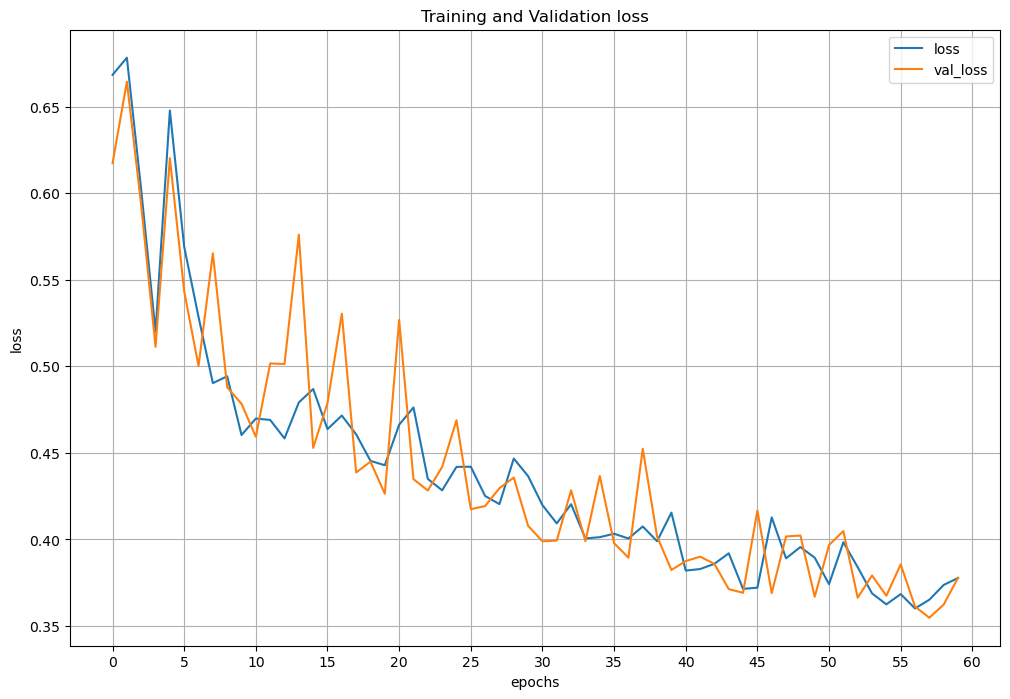

In [76]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

hist_df = pd.DataFrame(history.history)
hist_df.plot(y = ['loss', 'val_loss'], figsize = (12, 8))
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.grid(axis = 'both')
plt.xticks(np.arange(0, 61, 5))
plt.show()

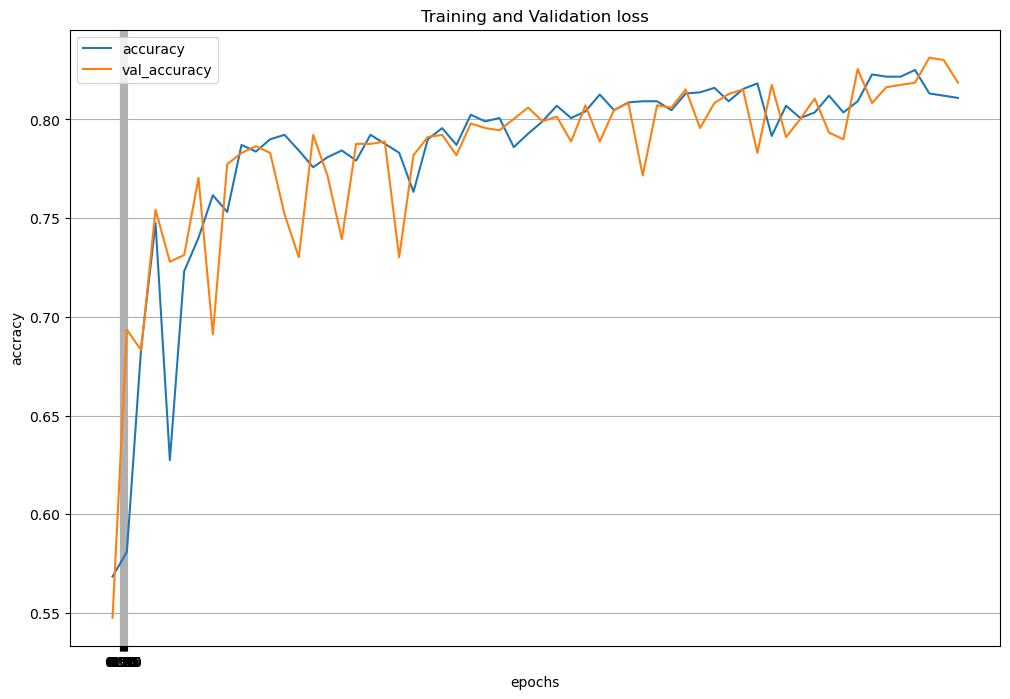

In [79]:
hist_df = pd.DataFrame(history.history)
hist_df.plot(y = ['accuracy', 'val_accuracy'], figsize = (12, 8))
plt.xlabel('epochs')
plt.ylabel('accracy')
plt.title('Training and Validation loss')
plt.grid(axis = 'both')
plt.xticks(np.arange(0, 61, 5))
plt.xticks(np.arange(0.5, 1.01, 0.05))
plt.show()

# Test And Calculate Accuracy

In [80]:
model.load_weights('saved-model/best-model')
model.evaluate(X_test, y_test)

21/21 [==============================] - 65s 3s/step - loss: 0.3631 - accuracy: 0.8121


[0.363120973110199, 0.8121212124824524]